# Data Mining : 재난 문자 분류하기
 **1) 데이터 속성 파악하기**

In [432]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv('train.csv', encoding='utf-8')
print(data)
print()
print()
data.info()

         id keyword  ...                                               text target
0         1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1         4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2         5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3         6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4         7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
...     ...     ...  ...                                                ...    ...
7608  10869     NaN  ...  Two giant cranes holding a bridge collapse int...      1
7609  10870     NaN  ...  @aria_ahrary @TheTawniest The out of control w...      1
7610  10871     NaN  ...  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...      1
7611  10872     NaN  ...  Police investigating after an e-bike collided ...      1
7612  10873     NaN  ...  The Latest: More Homes Razed by Northern Calif...      1

[76

**2) 중복 샘플 제거하기**

중복 제거 후 총 샘플의 수 :  7503

   target  count
0       0   4305
1       1   3198


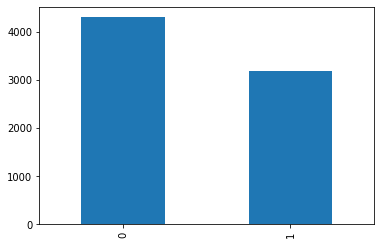

In [433]:
data.drop_duplicates(subset=['text'], inplace=True)
print('중복 제거 후 총 샘플의 수 : ', len(data))
print()

data['target'].value_counts().plot(kind='bar');
print(data.groupby('target').size().reset_index(name='count'))

In [434]:
Texts = data['text']
Targets = data['target']
print('트위터 text 내용의 개수 : ', len(Texts))
print('레이블의 개수 : ', len(Targets));

트위터 text 내용의 개수 :  7503
레이블의 개수 :  7503


- 줄임말(Abbreviation) 풀어쓰기
- 축약 풀어쓰기(Decontraction)
- 3자리 이상 숫자일 경우 하나로 퉁치기

In [435]:
print(Texts[:10])

slang_abbrev_dict = {
    ' AFAIK ': 'As Far As I Know', ' AFK ': 'Away From Keyboard', ' ASAP ': 'As Soon As Possible', ' ATK ': 'At The Keyboard',
    ' ATM ': 'At The Moment', ' A3 ': 'Anytime, Anywhere, Anyplace', ' BAK ': 'Back At Keyboard', ' BBL ': 'Be Back Later',
    ' BBS ': 'Be Back Soon', ' BFN ': 'Bye For Now', ' B4N ': 'Bye For Now', ' BRB ': 'Be Right Back',' BRT ': 'Be Right There',
    ' BTW ': 'By The Way',' B4 ': 'Before',' B4N ': 'Bye For Now',' CU ': 'See You',' CUL8R ': 'See You Later',
    ' CYA ': 'See You',' FAQ ': 'Frequently Asked Questions',' FC ': 'Fingers Crossed',' FWIW ': 'For What It\'s Worth',' FYI ': 'For Your Information',' GAL ': 'Get A Life',
    ' GG ': 'Good Game',' GN ': 'Good Night',' GMTA ': 'Great Minds Think Alike',' GR8 ': 'Great!',' G9 ': 'Genius',
    ' IC ': 'I See',' ICQ ': 'I Seek you',' ILU ': 'I Love You',' IMHO ': 'In My Humble Opinion',' IMO ': 'In My Opinion',' IOW ': 'In Other Words',
    ' IRL ': 'In Real Life',' KISS ': 'Keep It Simple, Stupid',' LDR ': 'Long Distance Relationship',' LMAO ': 'Laugh My Ass Off',' LOL ': 'Laughing Out Loud',
    ' LTNS ': 'Long Time No See',' L8R ': 'Later',' MTE ': 'My Thoughts Exactly',' M8 ': 'Mate',' NRN ': 'No Reply Necessary',
    ' OIC ': 'Oh I See',' OMG ': 'Oh My God',' PITA ': 'Pain In The Ass',' PRT ': 'Party',' PRW ': 'Parents Are Watching',' QPSA? ': 'Que Pasa?',
    ' ROFL ': 'Rolling On The Floor Laughing',' ROFLOL ': 'Rolling On The Floor Laughing Out Loud',' ROTFLMAO ': 'Rolling On The Floor Laughing My Ass Off',' SK8 ': 'Skate',
    ' STATS ': 'Your sex and age',' ASL ': 'Age, Sex, Location',' THX ': 'Thank You',' TTFN ': 'Ta-Ta For Now!',' TTYL ': 'Talk To You Later',' U ': 'You',' U2 ': 'You Too',
    ' U4E ': 'Yours For Ever',' WB ': 'Welcome Back',' WTF ': 'What The Fuck',' WTG ': 'Way To Go!',' WUF ': 'Where Are You From?',
    ' W8 ': 'Wait',' 7K ': 'Sick:-D Laugher',
    ' RN ': 'Right Now', 'IDK' : 'I Do not Know'
}

import re

Texts = np.array(Texts)

for i in range(len(Texts)):
  text = " " + Texts[i].upper() + " "

  for slang in slang_abbrev_dict.items():
    if text.find(slang[0]) != -1:
      text = re.sub(slang[0], " " + slang[1] + " ", text)

  text = text.lower()
  text = re.sub(" won\'t ", " will not ", text, flags=re.MULTILINE)
  text = re.sub(" can\'t ", " cannot ", text, flags=re.MULTILINE)

  text = re.sub("\'re ", " are ", text, flags=re.MULTILINE)
  text = re.sub("\'s ", " is ", text, flags=re.MULTILINE)
  text = re.sub("\'d ", " would ", text, flags=re.MULTILINE)
  text = re.sub("\'ll ", " will ", text, flags=re.MULTILINE)
  text = re.sub("\'m ", " am ", text, flags=re.MULTILINE)
  text = re.sub("n\'t ", " not ", text, flags=re.MULTILINE)
  text = re.sub("\'ve ", " have ", text, flags=re.MULTILINE)

  text = re.sub(' [0-9][,|0-9]*[0-9] ', ' specificnumberhere ', text)
  # text = re.sub(' #', ' hashtag ', text)

  Texts[i] = text

print(Texts[:10])

AfterText = Texts

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object
[' our deeds are the reason of this #earthquake may allah forgive us all '
 ' forest fire near la ronge sask. canada '
 " all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected "
 ' specificnumberhere people receive #wildfires evacuation orders in california  '
 ' just got sent this photo from ruby #alaska as smoke from #wildfires pours into a

**3) 토큰화, 텍스트 길이 살펴보기**

In [436]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Texts)
sequences = tokenizer.texts_to_sequences(Texts)
print(sequences[:5])
print()
word_to_index = tokenizer.word_index

[[116, 4471, 22, 4, 836, 8, 24, 263, 137, 1856, 4472, 88, 45], [185, 48, 236, 766, 6708, 6709, 1168], [45, 1680, 1440, 7, 6710, 6, 6711, 22, 136, 6712, 23, 1681, 43, 402, 281, 62, 2062, 6, 706, 1346, 22, 1060], [15, 66, 4473, 1441, 281, 1346, 6, 93], [39, 96, 1169, 24, 311, 27, 6713, 1857, 34, 264, 27, 1441, 6714, 72, 5, 183]]



In [437]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 1번 이하인 희귀 단어의 수 : ', rare_cnt)
print('단어 집합에서 희귀 단어의 비율 : ', (rare_cnt / total_cnt) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ', (rare_cnt/ total_freq) * 100)

등장 빈도가 1번 이하인 희귀 단어의 수 :  15633
단어 집합에서 희귀 단어의 비율 :  69.97761862130707
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  12.198604803595673


In [438]:
Texts = sequences
print('텍스트의 최대 길이 : ', max(len(l) for l in Texts))
print('텍스트의 최소 길이 : ', min(len(l) for l in Texts))
print('텍스트의 평균 길이 : ', (sum(map(len, Texts))/len(Texts)))

print()
print(sequences[:5])

텍스트의 최대 길이 :  34
텍스트의 최소 길이 :  1
텍스트의 평균 길이 :  17.080367852858856

[[116, 4471, 22, 4, 836, 8, 24, 263, 137, 1856, 4472, 88, 45], [185, 48, 236, 766, 6708, 6709, 1168], [45, 1680, 1440, 7, 6710, 6, 6711, 22, 136, 6712, 23, 1681, 43, 402, 281, 62, 2062, 6, 706, 1346, 22, 1060], [15, 66, 4473, 1441, 281, 1346, 6, 93], [39, 96, 1169, 24, 311, 27, 6713, 1857, 34, 264, 27, 1441, 6714, 72, 5, 183]]


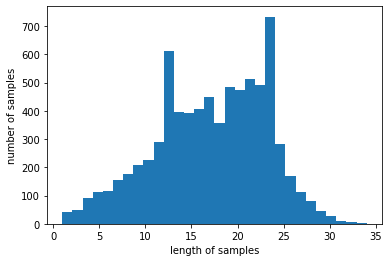

In [439]:
plt.hist([len(s) for s in Texts], bins=30)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

**4) 빈도 수가 낮은 희귀 단어 제거하기**

In [0]:
Texts = AfterText
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
tokenizer.fit_on_texts(Texts)
sequences = tokenizer.texts_to_sequences(Texts)
word_to_index = tokenizer.word_index

**5) 길이가 2 이하인 단어 제거하기**

In [441]:
print('길이 2 이하인 단어 제거 : ')
for word in word_to_index.items():
  if len(word[0]) <= 2:
    print(word[0], end = ' ')
    for sequence in sequences:
      if word[1] in sequence:
        sequence.remove(word[1])

길이 2 이하인 단어 제거 : 
t co a in to of is i on it my at by be do as me up am so no we an he if 2 or ' 3 us 1 rt s gt go 4 5 w û 8 pm 9 6 im u oh 08 m 7 p d n ok o 0 10 st b 00 r c lt ur mp 'i 11 bc 05 tv x 01 rd e la 06 15 uk ca ai vs dr 16 30 v de f 07 ap re 17 hi 04 el 18 29 l 50 mr ft nc un ii 25 24 j da 20 yo gm ah h ar 21 g 40 em ya dc al af di wa 12 09 ny id 75 k va ha ep sw mt wx 23 22 13 99 ms 90 pc se yr fr 52 54 ex xd ig en av ps ir mo 'a po 95 nu md i5 np nd th hd 26 dk 3g 77 03 eu cr z 70 y jr tf ty bp tr åè sa åê eb mi 36 wy 60 32 rs ns eq 94 14 nw 1' sp oc fb nb sb gf cd eh ik aa q tb 28 dj bu wo dq bs ga ee mf ed 19 op er sf wi ag ne 35 cm å¨ dw fd 34 ut aw 02 97 nm ev sm m1 ak hr os ts 45 sr nh tc xv mc pt wd m4 fm te ve rn å jp 98 et uh pp bg 1m 48 åç 3x 33 km fi si 27 4' 57 sj 0l ma ke nv vi 43 ml cs ac 65 5' 7p 7a ks tn bn dm sn ky nj cc bi aq ad rb a1 a5 1a 5s 5c ay tj ll 3m 41 pa 8m 58 3a bb az 'x 2a pd ae bk xl ìñ vp 88 92 74 ch pl mb q1 rq ye sg cg 38 ra 6c å¤ ìü br 

**6) RNN으로 분류하기**

In [442]:
max_len = max(len(l) for l in sequences)
data = pad_sequences(sequences, maxlen = max_len)
print('훈련 데이터의 shape: ', data.shape)

n_of_train = int(len(Texts)* 0.9)
print('전체 데이터의 크기 : ', len(Texts))
print('훈련 데이터의 크기 : ', n_of_train)
print('테스트 데이터의 크기 : ', len(Texts) - n_of_train)

X_test = data[n_of_train:]
Y_test = np.array(Targets[n_of_train:])
X_train = data[:n_of_train]
Y_train = np.array(Targets[:n_of_train])

훈련 데이터의 shape:  (7503, 26)
전체 데이터의 크기 :  7503
훈련 데이터의 크기 :  6752
테스트 데이터의 크기 :  751


In [450]:
from tensorflow.keras.layers import SimpleRNN, Activation, Embedding, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

vocab_size = len(word_to_index) + 1
print(vocab_size)

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(64, dropout = 0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs = 3, batch_size = 16, validation_split = 0.2)

22341
Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_127 (Embedding)    (None, None, 32)          714912    
_________________________________________________________________
simple_rnn_101 (SimpleRNN)   (None, 64)                6208      
_________________________________________________________________
dense_199 (Dense)            (None, 1)                 65        
Total params: 721,185
Trainable params: 721,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
338/338 [==============================] - 3s 10ms/step - loss: 0.6547 - acc: 0.6201 - val_loss: 0.5999 - val_acc: 0.7150
Epoch 2/3
338/338 [==============================] - 3s 9ms/step - loss: 0.5249 - acc: 0.7471 - val_loss: 0.5699 - val_acc: 0.7246
Epoch 3/3
338/338 [==============================] - 3s 10ms/step - loss: 0.4213 - acc: 0.8139 - val_loss: 

In [451]:
print("\n 테스트 정확도 : %.3f" % (model.evaluate(X_test, Y_test)[1]))

24/24 [==============================] - 0s 3ms/step - loss: 0.4988 - acc: 0.7736

 테스트 정확도 : 0.774


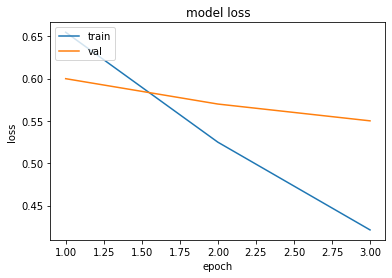

In [452]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()